## Hurdat2, Get Started!
In the following example we will walk through how we can leverage the `clouddrift` library to plot storm trajectories for the 2022 hurricane season.

Lets proceed with loading in the dataset and selecting the subset of data we want to plot.

In [1]:
import  numpy as np

from clouddrift.datasets import hurdat2
from clouddrift.ragged import subset
year = 2022
ds = hurdat2(basin="atlantic")
ds = subset(
    ds,
    {"time": (np.datetime64(f"{year}-01-01"), np.datetime64(f"{year}-12-31"))},
    row_dim_name="traj",
)

Now lets unpack the ragged array for the longituide and latitude observations for the storm trajectories. The unpack function will return the array segmented using the rowsize of each trajectory resulting in a list of row data variable segments.

In [2]:
from clouddrift.ragged import unpack

lons = unpack(ds.lon, ds.rowsize)
lats = unpack(ds.lat, ds.rowsize)

Lets now plot the trajectories.

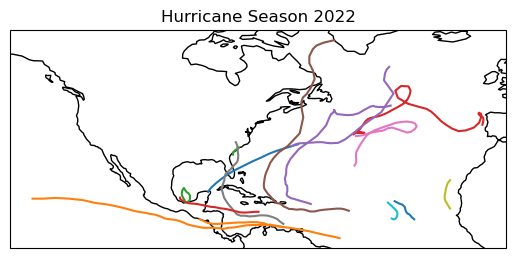

In [3]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

for idx in range(len(ds.id)):
    ax.plot(lons[idx], lats[idx])

ax.set_title(f"Hurricane Season {year}")
ax.coastlines()